In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset paths
train_dir = "/content/drive/MyDrive/Skin_Data/Cancer"
test_dir = "/content/drive/MyDrive/Skin_Data/Non_Cancer"

# Image size and batch size
image_size = (224, 224)
batch_size = 32

# Training and validation data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_gen = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset=None
)

test_gen = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset=None
)


Found 84 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


DenseNet


In [3]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define DenseNet model
def create_densenet():
    base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(1, activation="sigmoid")(x)  # Binary classification

    model = Model(inputs=base_model.input, outputs=output)
    return model

densenet_model = create_densenet()
densenet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train DenseNet
epochs = 5
print("Training DenseNet...")
densenet_history = densenet_model.fit(train_gen, validation_data=test_gen, epochs=epochs)

# Evaluate DenseNet
val_loss, val_acc = densenet_model.evaluate(test_gen)
print(f"DenseNet - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training DenseNet...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 27s/step - accuracy: 0.4695 - loss: 1.0133 - val_accuracy: 0.4853 - val_loss: 0.7754
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 67s 29s/step - accuracy: 0.5374 - loss: 0.7621 - val_accuracy: 0.2843 - val_loss: 1.0066
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 45s/step - accuracy: 0.5357 - loss: 0.7690 - val_accuracy: 0.7696 - val_loss: 0.5677
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 27s/step - accuracy: 0.6271 - loss: 0.6329 - val_accuracy: 0.7304 - val_loss: 0.5824
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 26s/step - accuracy: 0.6734 - loss: 0.5545 - val_accuracy: 0.4216 - val_loss: 0.8354
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.3905 - loss: 0.8750
DenseNet - Loss: 0.8354, Accuracy: 0.4216


ResNet

In [4]:
from tensorflow.keras.applications import ResNet50

# Define ResNet model
def create_resnet():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

resnet_model = create_resnet()
resnet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train ResNet
print("Training ResNet...")
resnet_history = resnet_model.fit(train_gen, validation_data=test_gen, epochs=epochs)

# Evaluate ResNet
val_loss, val_acc = resnet_model.evaluate(test_gen)
print(f"ResNet - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training ResNet...
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 27s/step - accuracy: 0.5083 - loss: 0.8927 - val_accuracy: 0.2059 - val_loss: 1.3647
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 25s/step - accuracy: 0.4727 - loss: 0.9301 - val_accuracy: 0.7941 - val_loss: 0.6667
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 25s/step - accuracy: 0.4805 - loss: 0.6985 - val_accuracy: 0.7941 - val_loss: 0.5494
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 25s/step - accuracy: 0.4766 - loss: 0.7571 - val_accuracy: 0.2059 - val_loss: 0.7026
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 69s 30s/step - accuracy: 0.4570 - loss: 0.6896 - val_accuracy: 0.2059 - val_loss: 0.8248
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.1870 - loss: 0.8325
ResNet - Loss: 0.8248, Accuracy: 0.2059


InceptionResNetV2

In [5]:
from tensorflow.keras.applications import InceptionResNetV2

# Define InceptionResNetV2 model
def create_inception_resnet():
    base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

inception_resnet_model = create_inception_resnet()
inception_resnet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train InceptionResNetV2
print("Training InceptionResNetV2...")
inception_resnet_history = inception_resnet_model.fit(train_gen, validation_data=test_gen, epochs=epochs)

# Evaluate InceptionResNetV2
val_loss, val_acc = inception_resnet_model.evaluate(test_gen)
print(f"InceptionResNetV2 - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training InceptionResNetV2...
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 117s 44s/step - accuracy: 0.4612 - loss: 2.3869 - val_accuracy: 0.7500 - val_loss: 0.5881
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 87s 38s/step - accuracy: 0.5156 - loss: 1.0876 - val_accuracy: 0.2059 - val_loss: 1.5722
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 87s 38s/step - accuracy: 0.4825 - loss: 1.1579 - val_accuracy: 0.7941 - val_loss: 0.5379
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 87s 39s/step - accuracy: 0.5250 - loss: 0.8134 - val_accuracy: 0.7941 - val_loss: 0.5387
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 37s/step - accuracy: 0.5412 - loss: 0.7002 - val_accuracy: 0.3922 - val_loss: 0.7599
7/7 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step - accuracy: 0.3980 - loss: 0.7622
InceptionResNetV2 - Loss: 0.7599, Accuracy: 0.3922


Save Trained Models

In [6]:
densenet_model.save("densenet_model.h5")
resnet_model.save("resnet_model.h5")
inception_resnet_model.save("inception_resnet_model.h5")


Plot Training Performance

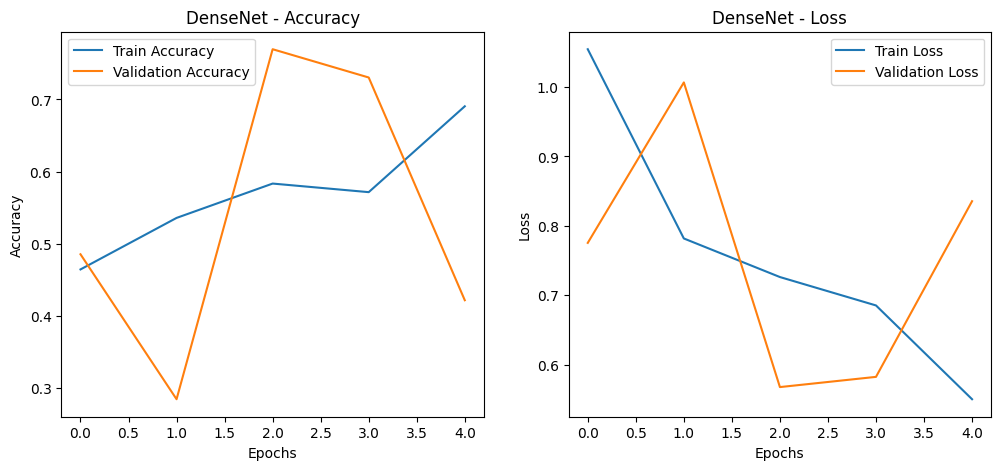

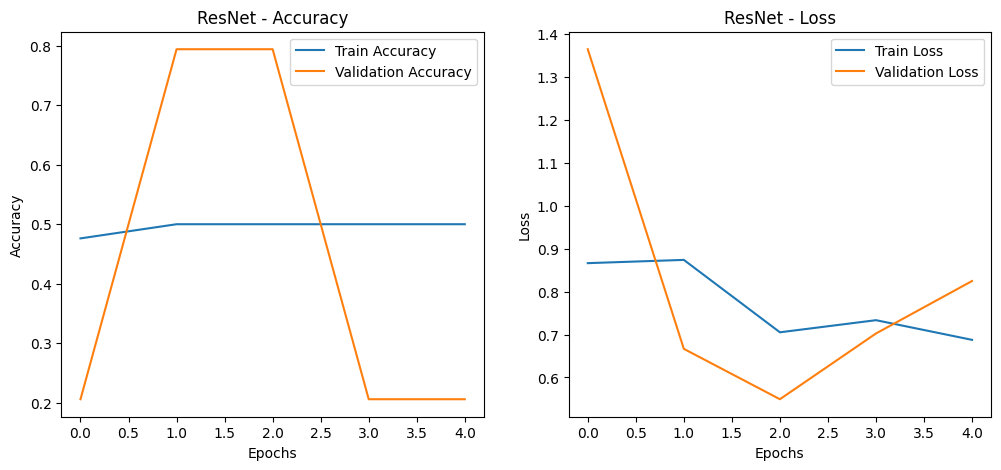

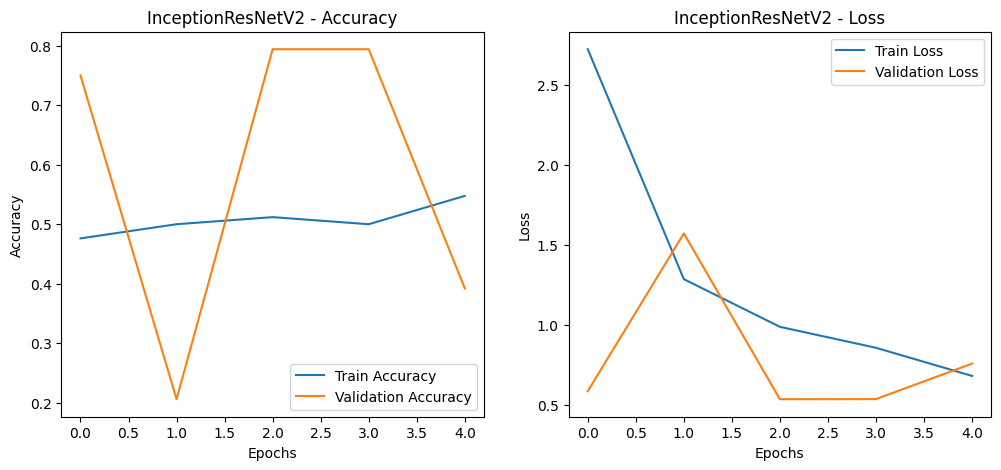

In [7]:
import matplotlib.pyplot as plt

def plot_training(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Plot training for each model
plot_training(densenet_history, "DenseNet")
plot_training(resnet_history, "ResNet")
plot_training(inception_resnet_history, "InceptionResNetV2")


Evaluate Each Model

In [8]:
print("DenseNet Evaluation:")
val_loss, val_acc = densenet_model.evaluate(test_gen)
print(f"Loss: {val_loss}, Accuracy: {val_acc}")

print("ResNet Evaluation:")
val_loss, val_acc = resnet_model.evaluate(test_gen)
print(f"Loss: {val_loss}, Accuracy: {val_acc}")

print("InceptionResNetV2 Evaluation:")
val_loss, val_acc = inception_resnet_model.evaluate(test_gen)
print(f"Loss: {val_loss}, Accuracy: {val_acc}")


DenseNet Evaluation:
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.4484 - loss: 0.8045
Loss: 0.8354471921920776, Accuracy: 0.4215686321258545
ResNet Evaluation:
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.2086 - loss: 0.8234
Loss: 0.8247645497322083, Accuracy: 0.20588235557079315
InceptionResNetV2 Evaluation:
7/7 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.4040 - loss: 0.7642
Loss: 0.7598903179168701, Accuracy: 0.3921568691730499


Visual Comparison

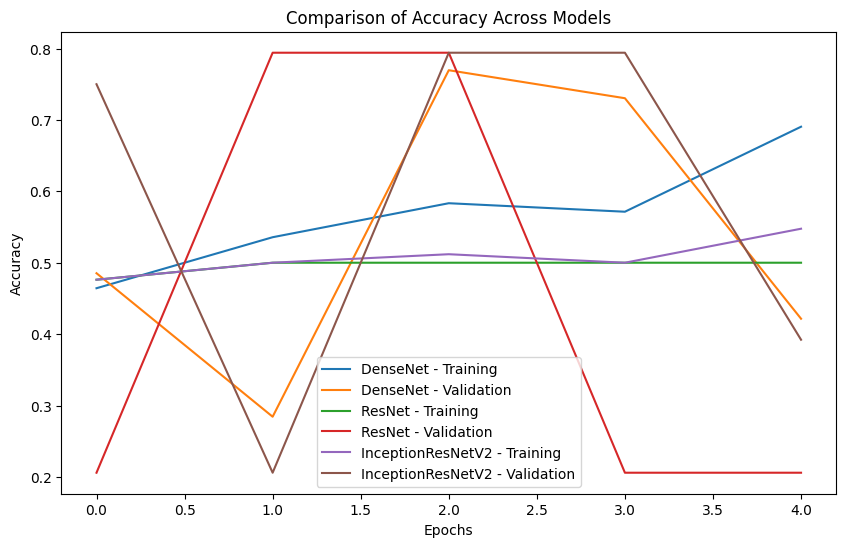

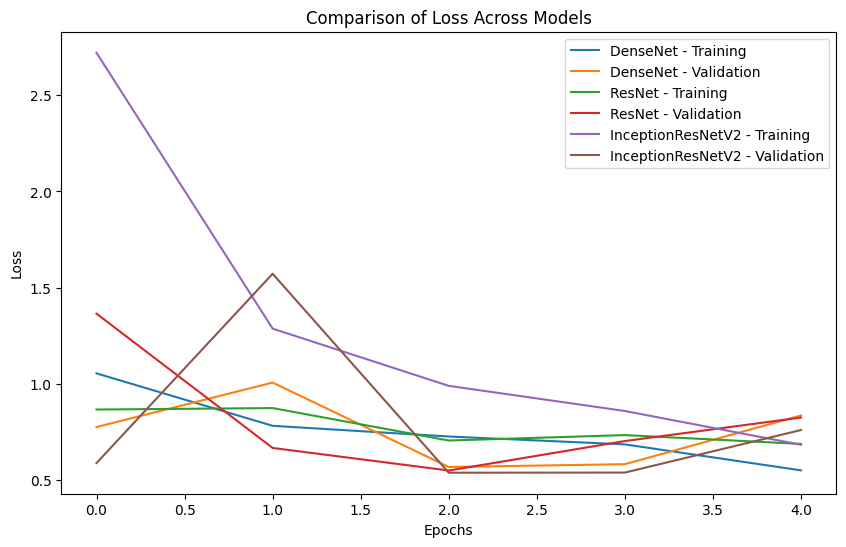

In [9]:
# Plot Accuracy and Loss Curves for All Models
import matplotlib.pyplot as plt

def plot_comparison(histories, labels, metric):
    plt.figure(figsize=(10, 6))

    for history, label in zip(histories, labels):
        plt.plot(history.history[metric], label=f"{label} - Training")
        plt.plot(history.history[f"val_{metric}"], label=f"{label} - Validation")

    plt.title(f"Comparison of {metric.capitalize()} Across Models")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Compare Accuracy
plot_comparison(
    [densenet_history, resnet_history, inception_resnet_history],
    ["DenseNet", "ResNet", "InceptionResNetV2"],
    "accuracy"
)

# Compare Loss
plot_comparison(
    [densenet_history, resnet_history, inception_resnet_history],
    ["DenseNet", "ResNet", "InceptionResNetV2"],
    "loss"
)
